In [98]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [99]:
data = pd.read_csv('C:/Users/prana/Desktop/SAI/diabetes.csv')
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [100]:
data.columns


Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [102]:
data.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

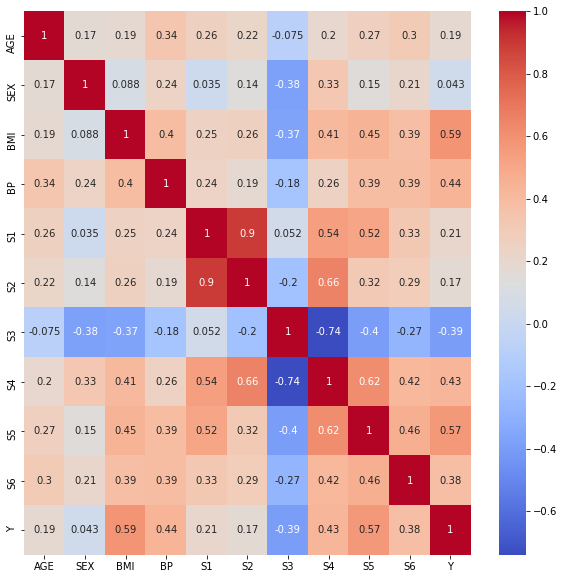

In [103]:
plt.figure(figsize=(10,10))
seaborn.heatmap(data.corr(), annot=True, cmap = "coolwarm")

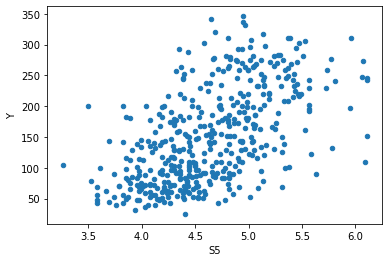

In [104]:
data.plot(kind='scatter', x='S5', y='Y')
# AGE SCATTERED MORE
# SEX: NOT AT ALL
# BMI: CAN TRY --- THIS IS IT
# BP: NOPE
# S1:NOPE
# S2:NOPE
# S3:NOPE
# S4:NO CHANCE
# S5:CAN TRY
# S6:NO CHANCE
plt.show()

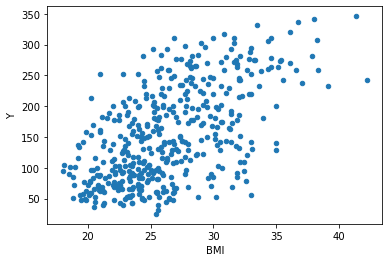

In [105]:
data.plot(kind='scatter', x='BMI', y='Y')
# AGE SCATTERED MORE
# SEX: NOT AT ALL
# BMI: CAN TRY --- THIS IS IT
# BP: NOPE
# S1:NOPE
# S2:NOPE
# S3:NOPE
# S4:NO CHANCE
# S5:CAN TRY
# S6:NO CHANCE
plt.show()

In [106]:
x = data['BMI']
y = data['Y']

In [107]:
x

0      32.1
1      21.6
2      30.5
3      25.3
4      23.0
       ... 
437    28.2
438    24.9
439    24.9
440    30.0
441    19.6
Name: BMI, Length: 442, dtype: float64

In [108]:
y

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64

In [109]:
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 10)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [110]:
len(X_train)

353

In [111]:
len(Y_train)

353

In [112]:
len(X_test)

89

In [113]:
len(Y_test)

89

In [115]:
X_train

array([[31.9],
       [33.8],
       [24.1],
       [33.1],
       [29.5],
       [31.4],
       [22.8],
       [25.6],
       [20.4],
       [27.7],
       [22.7],
       [23.3],
       [28.1],
       [27.8],
       [25.8],
       [22.1],
       [22.5],
       [29. ],
       [34.6],
       [25.1],
       [20.6],
       [31.9],
       [27.2],
       [23.3],
       [29.2],
       [20.7],
       [18. ],
       [27.5],
       [19.9],
       [25.5],
       [30. ],
       [33.3],
       [32.1],
       [28.1],
       [24. ],
       [25.5],
       [31.9],
       [27.7],
       [22.8],
       [23.4],
       [22.1],
       [23.4],
       [23.5],
       [28.8],
       [32. ],
       [26.5],
       [28. ],
       [28.7],
       [22.1],
       [29.8],
       [31.4],
       [34.3],
       [28.3],
       [20.5],
       [25.8],
       [28.8],
       [23.2],
       [21.3],
       [26.8],
       [26.7],
       [25.8],
       [31.4],
       [32.7],
       [27.5],
       [27.3],
       [30.5],
       [24

In [116]:
LR = LinearRegression()

In [117]:
LR.fit(X_test, Y_test)

LinearRegression()

In [88]:
LR.predict(X_test)

array([107.70476691, 193.15348728, 157.3842555 , 135.52528052,
       160.36502481, 177.25605093, 128.57015211, 268.66630994,
       113.66630554, 129.56374188, 129.56374188, 147.44835778,
       184.21117933,  77.89707375, 132.5445112 , 256.74323268,
       147.44835778, 113.66630554, 211.03810317,  94.78809987,
       128.57015211, 239.85220656, 107.70476691, 205.07656454,
        86.8393817 , 122.60861348, 143.47399869, 114.65989531,
       167.32015321, 116.64707485, 241.8393861 , 236.87143724,
        95.78168964, 118.63425439, 180.23682025, 155.39707595,
       103.73040782, 193.15348728, 264.69195085, 139.4996396 ,
       150.42912709, 133.53810097, 218.98682135, 146.45476801,
        92.80092033, 143.47399869,  93.7945101 ,  75.90989421,
       252.76887359, 115.65348508, 123.60220325,  96.77527942,
        83.85861238, 236.87143724, 207.06374409, 122.60861348,
       129.56374188, 146.45476801, 173.28169184, 149.43553732,
       148.44194755, 109.69194645, 122.60861348,  73.92

In [118]:
Y_test

119    200
207    202
236     67
288     80
174    151
      ... 
37     276
66     150
305    124
308    114
12     179
Name: Y, Length: 89, dtype: int64

In [119]:
LR.score(X_test, Y_test)

0.37142524353983986

In [120]:
y_predict = LR.predict(X_test)

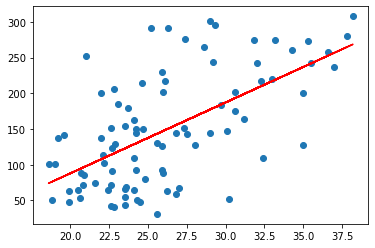

In [92]:
plt.scatter(X_test, Y_test)
plt.plot(X_test,y_predict, color='red')
plt.show()

In [121]:
print(LR.coef_)

[9.93589772]


In [122]:
print(LR.intercept_)

-110.88498289213743


In [125]:
mean_squared_error(Y_test, y_predict)

3929.3405500516633